In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load cleaned data
df = pd.read_csv("D:/Project/Guvi_Project/Medical Insurance Cost Prediction/medical_insurance.csv")
print(df.head())

   age  sex     bmi  children  smoker     region      charges bmi_category  \
0   19    1  27.900         0       1  southwest  16884.92400   overweight   
1   18    0  33.770         1       0  southeast   1725.55230        obese   
2   28    0  33.000         3       0  southeast   4449.46200        obese   
3   33    0  22.705         0       0  northwest  21984.47061       normal   
4   32    0  28.880         0       0  northwest   3866.85520   overweight   

   log_charges  
0     9.734236  
1     7.453882  
2     8.400763  
3     9.998137  
4     8.260455  


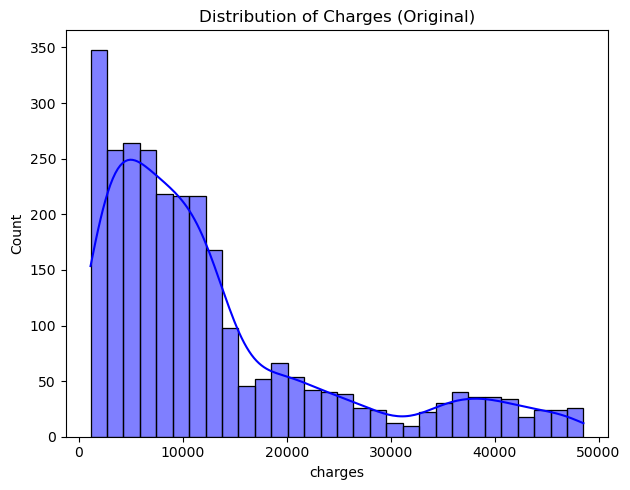

In [5]:
# 1. What is the distribution of medical insurance charges?
plt.figure(figsize=(12, 5))

# Original Charges
plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True, color='blue', bins=30)
plt.title('Distribution of Charges (Original)')

plt.tight_layout()
plt.show()

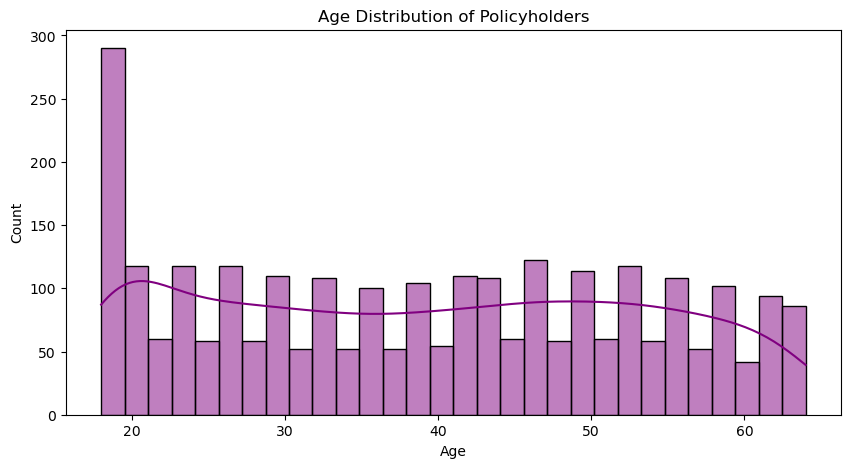

Average Age: 39.0 years


In [7]:
# 2. What is the age distribution of the individuals?
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution of Policyholders')
plt.xlabel('Age')
plt.show()

print(f"Average Age: {df['age'].mean():.1f} years")

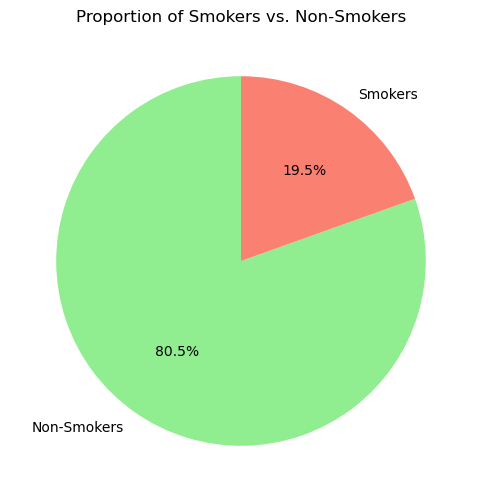

Smokers: 536 | Non-Smokers: 2208


In [9]:
# 3. How many people are smokers vs non-smokers?
smoker_counts = df['smoker'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=['Non-Smokers', 'Smokers'], autopct='%1.1f%%', 
        colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Proportion of Smokers vs. Non-Smokers')
plt.show()

print(f"Smokers: {smoker_counts[1]} | Non-Smokers: {smoker_counts[0]}")

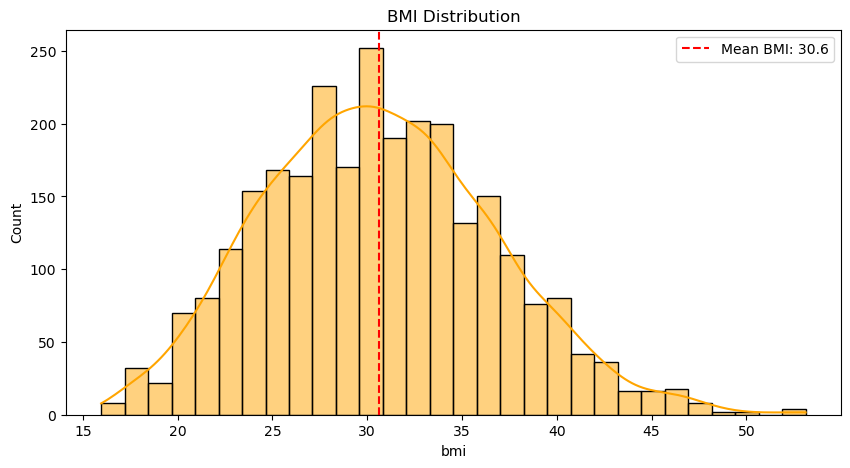

In [13]:
# 4. What is the average BMI in the dataset?
avg_bmi = df['bmi'].mean()
bmi_dist = df['bmi'].describe()

plt.figure(figsize=(10, 5))
sns.histplot(df['bmi'], bins=30, kde=True, color='orange')
plt.axvline(avg_bmi, color='red', linestyle='--', label=f'Mean BMI: {avg_bmi:.1f}')
plt.title('BMI Distribution')
plt.legend()
plt.show()

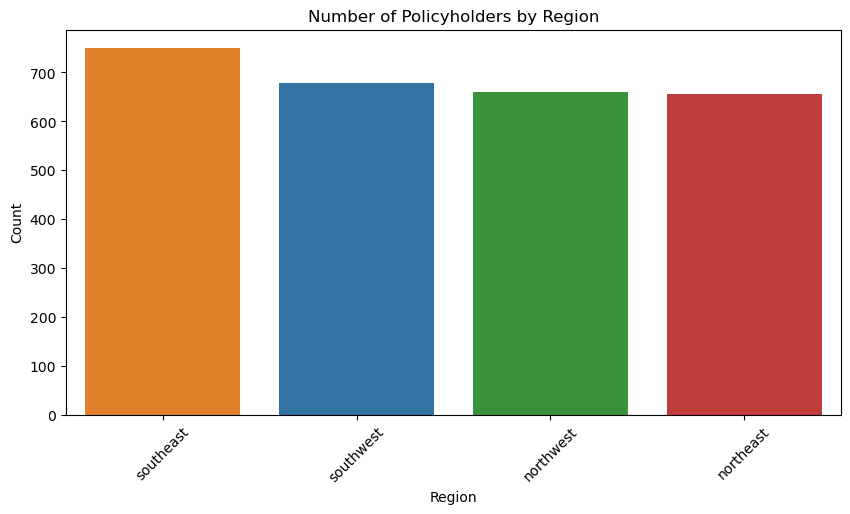

In [27]:
# 5. Which regions have the most number of policyholders?
plt.figure(figsize=(10, 5))
sns.countplot(x='region', data=df, order=df['region'].value_counts().index, hue='region')
plt.title('Number of Policyholders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

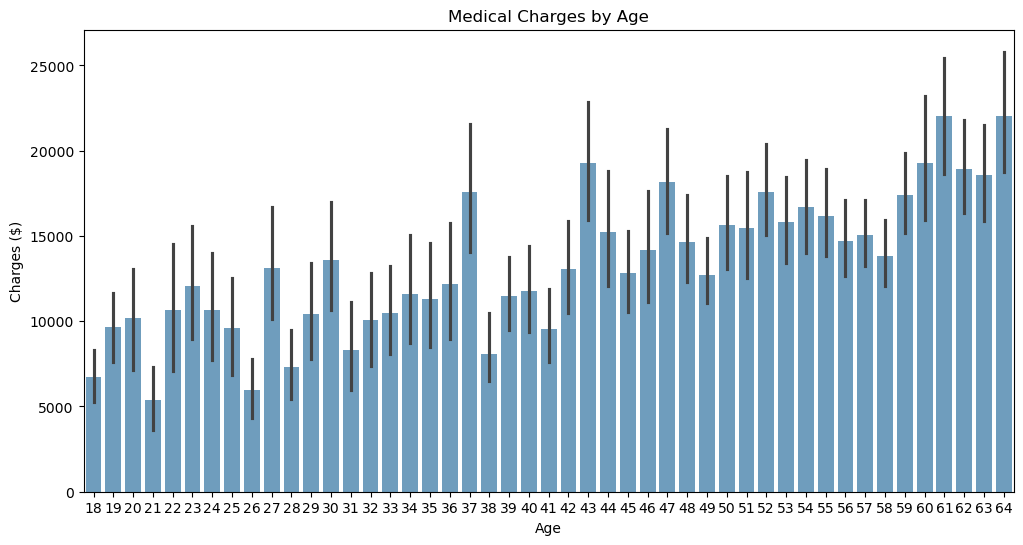

In [63]:
# 6. How do charges vary with age?
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='charges', data=df, alpha=0.7)
plt.title('Medical Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

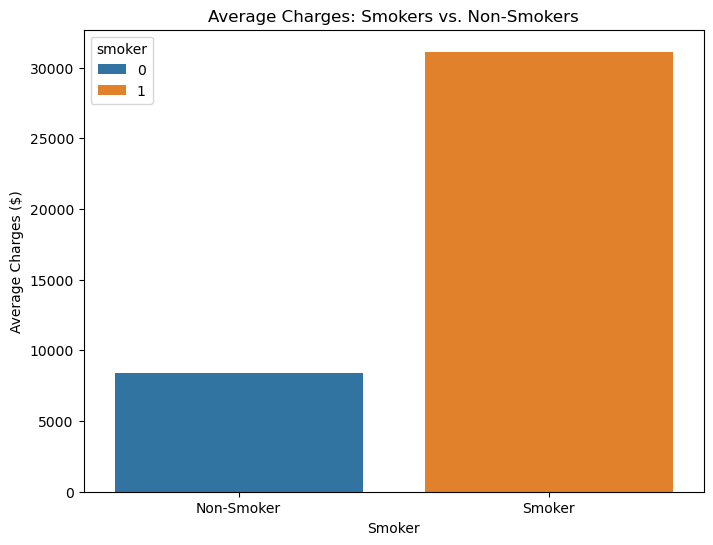

Smokers pay 3.7x more than non-smokers


In [67]:
# 7. Is there a difference in average charges between smokers and non-smokers?
avg_charges = df.groupby('smoker')['charges'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=avg_charges, hue='smoker')
plt.title('Average Charges: Smokers vs. Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Average Charges ($)')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

print(f"Smokers pay {avg_charges.iloc[1,1]/avg_charges.iloc[0,1]:.1f}x more than non-smokers")

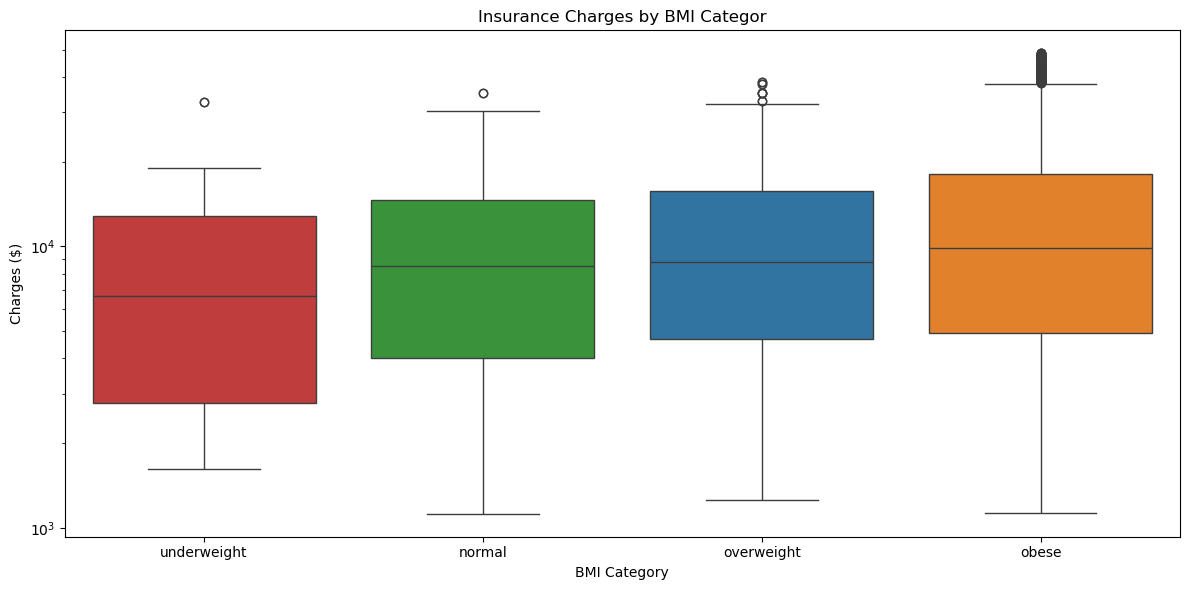

In [97]:
# 8. Does BMI impact insurance charges?
plt.figure(figsize=(12, 6))
sns.boxplot(x='bmi_category', y='charges', data=df, hue='bmi_category', 
            order=['underweight', 'normal', 'overweight', 'obese'])
plt.title('Insurance Charges by BMI Categor')
plt.xlabel('BMI Category')
plt.ylabel('Charges ($)')
plt.yscale('log')  # Log scale to better visualize wide charge ranges
plt.tight_layout()
plt.show()

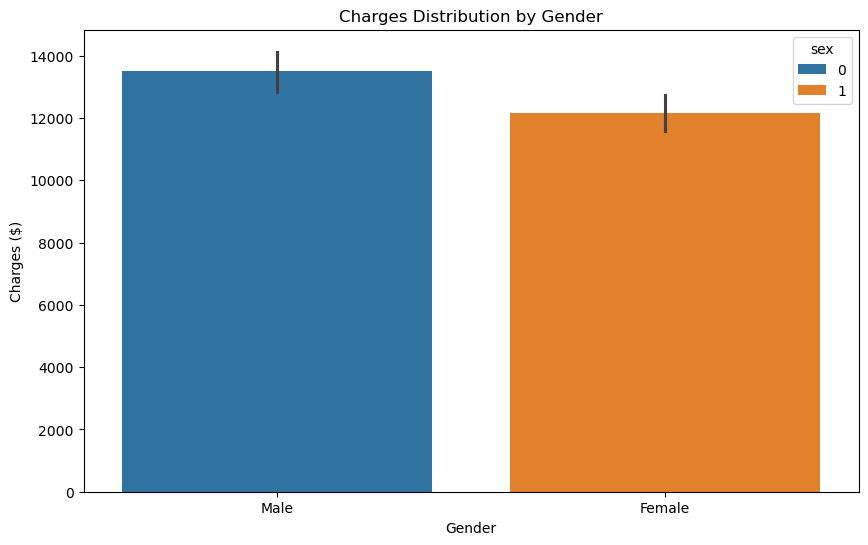

In [117]:
# 9. Do men or women pay more on average?
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='charges', data=df, hue='sex')
plt.title('Charges Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges ($)')
plt.xticks([0, 1], ['Male', 'Female'])
# Log scale for better visualization
plt.show()

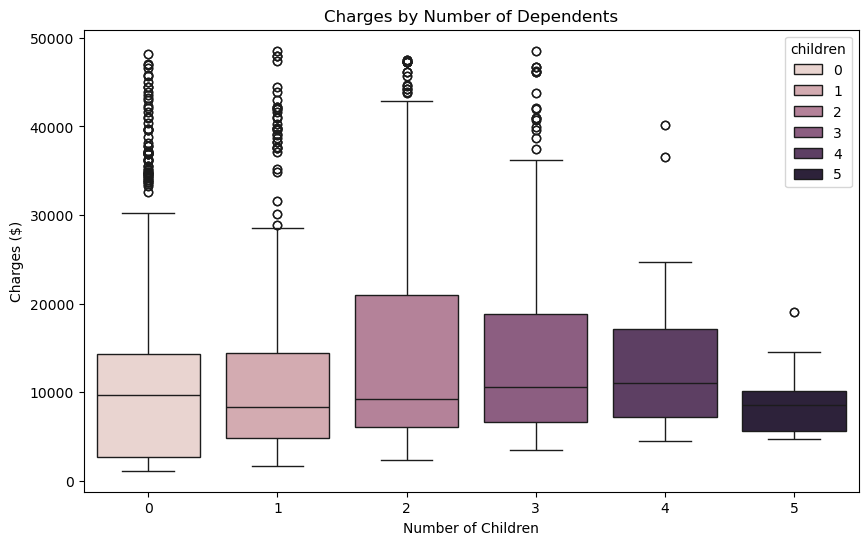

Correlation between children and charges: 0.080


In [233]:
# 10. Is there a correlation between the number of children and the insurance charges?
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges',hue='children', data=df)
plt.title('Charges by Number of Dependents')
plt.xlabel('Number of Children')
plt.ylabel('Charges ($)')
plt.show()

# Correlation coefficient
corr = df[['children', 'charges']].corr().iloc[0,1]
print(f"Correlation between children and charges: {corr:.3f}")

<Figure size 800x200 with 0 Axes>

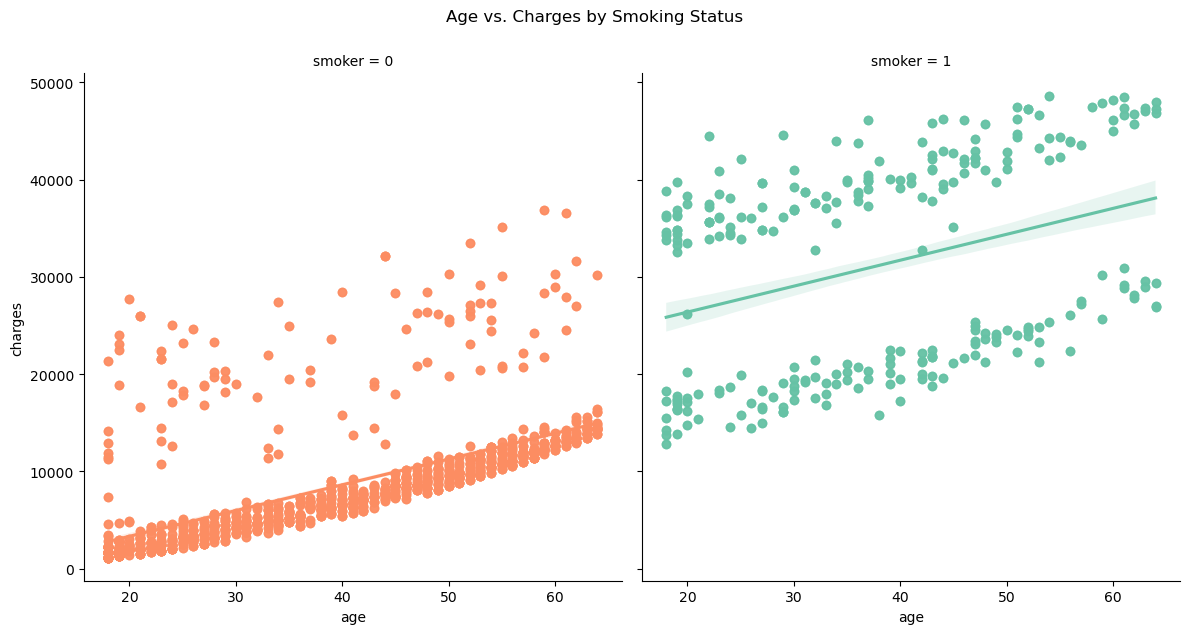

In [135]:
# 11. How does smoking status combined with age affect medical charges?
plt.figure(figsize=(8, 2))
sns.lmplot(x='age', y='charges', hue='smoker', col='smoker',
           data=df, palette=['#fc8d62','#66c2a5'], height=6, aspect=1)
plt.suptitle('Age vs. Charges by Smoking Status', y=1.05)
plt.show()

<Figure size 1400x600 with 0 Axes>

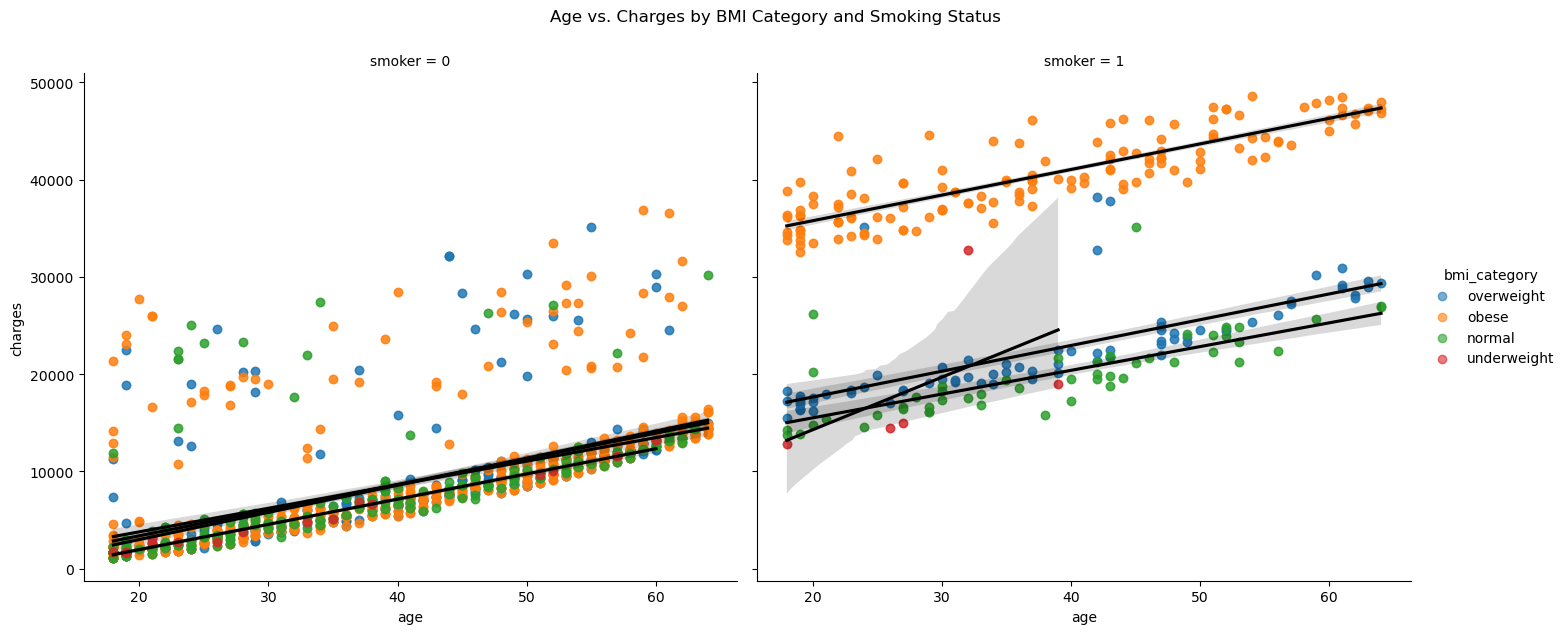

In [167]:
# 12. How do age, BMI, and smoking status together affect insurance cost?
plt.figure(figsize=(14, 6))
sns.lmplot(x='age', y='charges', hue='bmi_category', col='smoker',
           data=df, height=6, aspect=1.2,
           scatter_kws={'alpha':0.6}, line_kws={'color':'black'})
plt.suptitle('Age vs. Charges by BMI Category and Smoking Status', y=1.05)
plt.show()

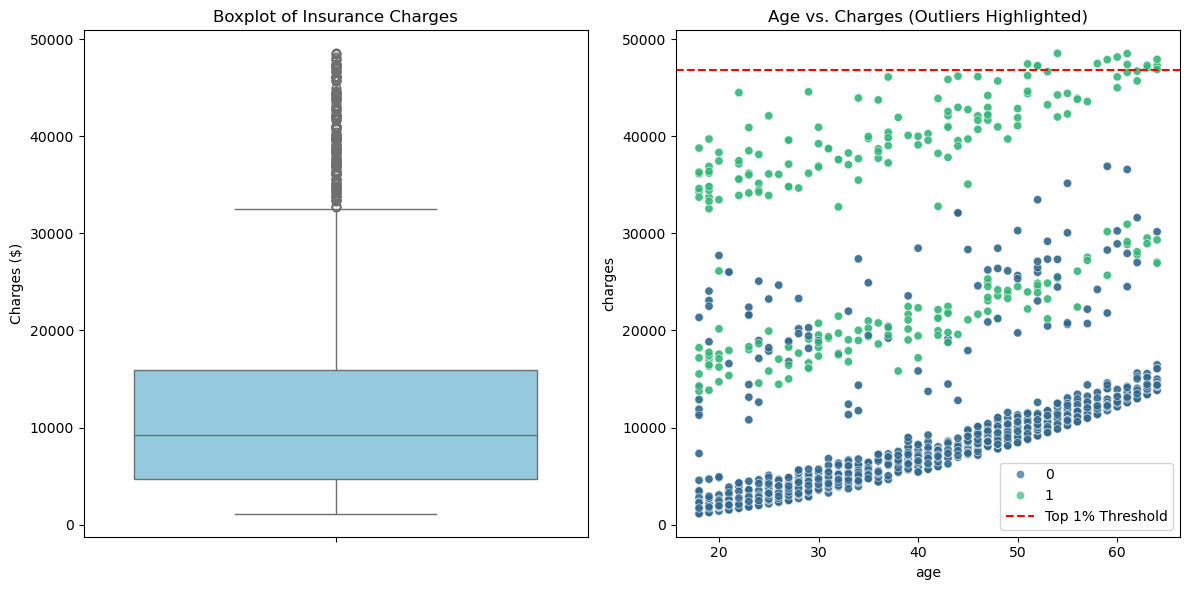

In [173]:
# 13. Are there outliers in the charges column? Who are the individuals paying the highest costs?
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='charges', data=df, color='skyblue')
plt.title('Boxplot of Insurance Charges')
plt.ylabel('Charges ($)')

# Scatter plot (Age vs. Charges)
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='viridis', alpha=0.7)
plt.title('Age vs. Charges (Outliers Highlighted)')
plt.axhline(y=df['charges'].quantile(0.99), color='red', linestyle='--', label='Top 1% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

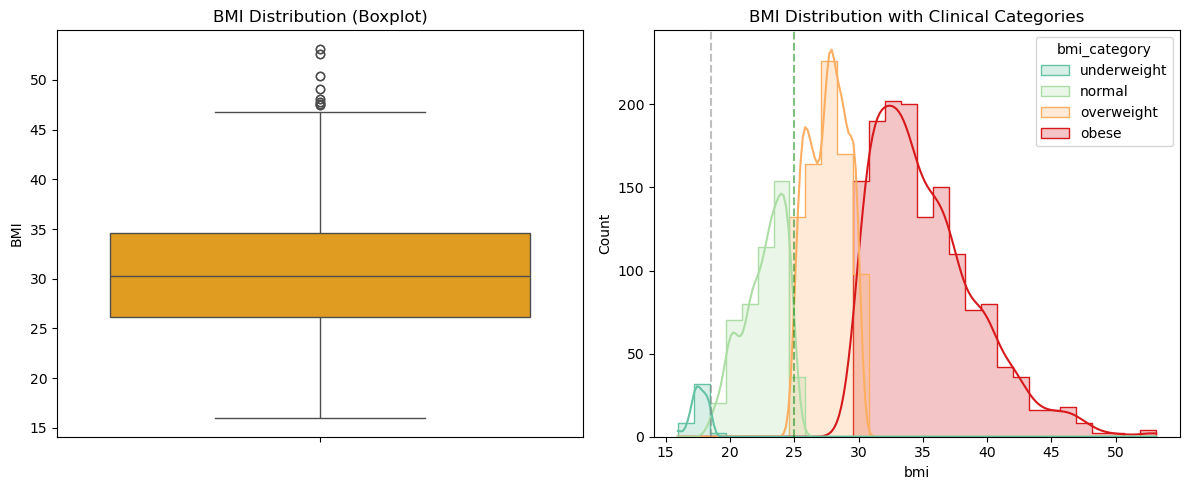

In [211]:
# 14. Are there extreme BMI values that could skew predictions?
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='bmi', data=df, color='orange')
plt.title('BMI Distribution (Boxplot)')
plt.ylabel('BMI')

# Histogram with category coloring
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='bmi', hue='bmi_category', 
             hue_order=['underweight', 'normal', 'overweight', 'obese'],
             palette=['#66c2a5', '#abdda4', '#fdae61', '#d7191c'],
             bins=30, element='step', kde=True)
plt.title('BMI Distribution with Clinical Categories')
plt.axvline(18.5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(25, color='green', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

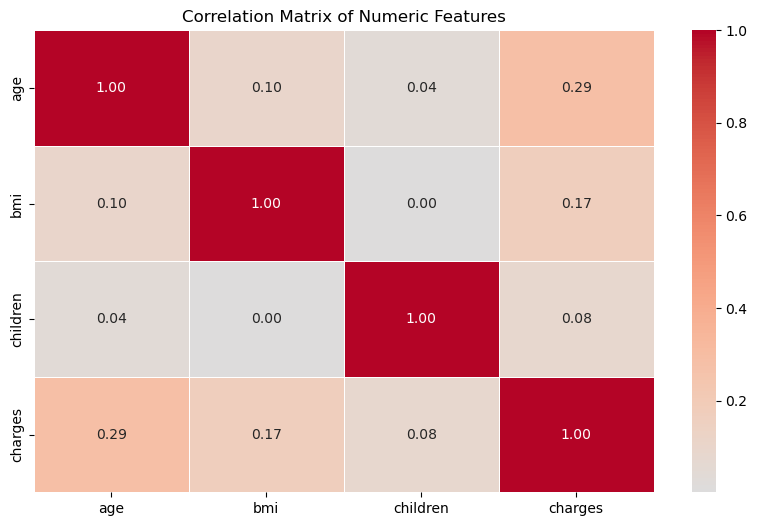

In [213]:
# 15. What is the correlation between numeric features like age, BMI, number of children, and charges?
# Select numeric columns
numeric_cols = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [223]:
# 16. Which features have the strongest correlation with the target variable (charges)?
# Calculate correlations with charges (include encoded categoricals if available)
correlations = df.corr(numeric_only=True)[['charges']].sort_values('charges', ascending=False)

# Display top correlations
print("Correlation with Charges:")
print(correlations)

Correlation with Charges:
              charges
charges      1.000000
log_charges  0.895574
smoker       0.782620
age          0.290582
bmi          0.172771
children     0.080191
sex         -0.058372


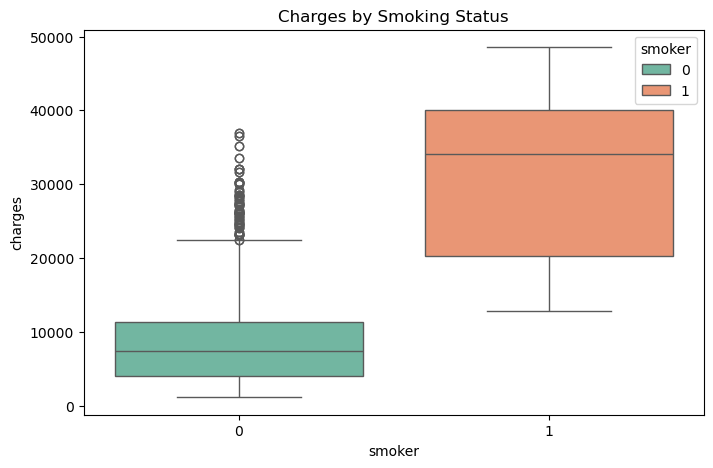

In [229]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges',hue='smoker', data=df, palette=['#66c2a5','#fc8d62'])
plt.title('Charges by Smoking Status')
plt.show()